github file link: https://github.com/tseng097/EE5393/blob/main/EE5393_hw1.ipynb 

## Problem 1

In [86]:
import numpy as np

def simulate_reaction_network(step=100000,x1 = 110, x2 =26, x3 = 55):

    outcomes = {"C1": 0, "C2": 0, "C3": 0}

    for i in range(step):
        if x1 >= 150:
            outcomes["C1"] += 1
        if x2 < 10:
            outcomes["C2"] += 1
        if x3 > 100:
            outcomes["C3"] += 1

        a1 = 0.5 * x1 * (x1 - 1) * x2
        a2 = x1 * x3 * (x3 - 1)
        a3 = 3 * x2 * x3
        a0 = a1 + a2 + a3

        if a0 == 0:
          print("deadlock")
          break

        p1 = a1 / a0
        p2 = a2 / a0
        p3 = a3 / a0

        reaction = np.random.choice([1, 2, 3], p=[p1, p2, p3])

        if i%100000 == 0:
          print(f"Step: {i}, X1: {x1}, X2: {x2}, X3: {x3}, P1: {p1:.4f}, P2: {p2:.4f}, P3: {p3:.4f}, Reaction: {reaction}")
        if reaction == 1:
            x1, x2, x3 = x1 - 2, x2 - 1, x3 + 4
        elif reaction == 2:
            x1, x2, x3 = x1 - 1, x2 + 3, x3 - 2
        elif reaction == 3:
            x1, x2, x3 = x1 + 2, x2 - 1, x3 - 1



    print(f"number of simulation: {step}")
    print(f"C1: {outcomes['C1']}")
    print(f"C2: {outcomes['C2']}")
    print(f"C3: {outcomes['C3']}")

simulate_reaction_network(step=3000000)

Step: 0, X1: 110, X2: 26, X3: 55, P1: 0.3202, P2: 0.6710, P3: 0.0088, Reaction: 2
Step: 100000, X1: 74, X2: 25642, X3: 931, P1: 0.3379, P2: 0.3126, P3: 0.3494, Reaction: 2
Step: 200000, X1: 72, X2: 51458, X3: 1527, P1: 0.2458, P2: 0.3136, P3: 0.4406, Reaction: 2
Step: 300000, X1: 102, X2: 77338, X3: 2007, P1: 0.3125, P2: 0.3222, P3: 0.3653, Reaction: 2
Step: 400000, X1: 86, X2: 103338, X3: 2402, P1: 0.2334, P2: 0.3065, P3: 0.4601, Reaction: 2
Step: 500000, X1: 110, X2: 129290, X3: 2804, P1: 0.2842, P2: 0.3170, P3: 0.3988, Reaction: 3
Step: 600000, X1: 119, X2: 155310, X3: 3144, P1: 0.2922, P2: 0.3152, P3: 0.3926, Reaction: 2
Step: 700000, X1: 106, X2: 181242, X3: 3616, P1: 0.2313, P2: 0.3178, P3: 0.4509, Reaction: 2
Step: 800000, X1: 117, X2: 207366, X3: 3830, P1: 0.2556, P2: 0.3116, P3: 0.4328, Reaction: 1
Step: 900000, X1: 145, X2: 233254, X3: 4303, P1: 0.2995, P2: 0.3301, P3: 0.3703, Reaction: 3
Step: 1000000, X1: 151, X2: 259438, X3: 4452, P1: 0.3127, P2: 0.3185, P3: 0.3688, Reacti

### (a)
In the long run, numbers of all element is growing. So P(C1) and P(C3) equal to 1 because it must be happened if we produce "infinity time" The number of $X_1$, $X_3$ will be violently inflated due to the enormous number of $X_2$. And P(C2) = 0 because number of $X_2$ always growing dynamically in simulation.

### (b)

In [47]:


def simulate_reaction_network_b(trials=10000, step=7):

    x1_results = np.zeros(trials)
    x2_results = np.zeros(trials)
    x3_results = np.zeros(trials)

    for trial in range(trials):

        x1, x2, x3 = 9, 8, 7

        for i in range(step):
            a1 = 0.5 * x1 * (x1 - 1) * x2
            a2 = x1 * x3 * (x3 - 1)
            a3 = 3 * x2 * x3
            a0 = a1 + a2 + a3

            if a0 == 0:
                break

            p1 = a1 / a0
            p2 = a2 / a0
            p3 = a3 / a0

            reaction = np.random.choice([1, 2, 3], p=[p1, p2, p3])

            if reaction == 1:
                x1, x2, x3 = x1 - 2, x2 - 1, x3 + 4
            elif reaction == 2:
                x1, x2, x3 = x1 - 1, x2 + 3, x3 - 2
            elif reaction == 3:
                x1, x2, x3 = x1 + 2, x2 - 1, x3 - 1

        x1_results[trial] = x1
        x2_results[trial] = x2
        x3_results[trial] = x3

    print(f"simulation time: {trials}, step: {step}")
    print(f"X1 - mean: {np.mean(x1_results):.4f}, var: {np.var(x1_results):.4f}")
    print(f"X2 - mean: {np.mean(x2_results):.4f}, var: {np.var(x2_results):.4f}")
    print(f"X3 - mean: {np.mean(x3_results):.4f}, var: {np.var(x3_results):.4f}")

simulate_reaction_network_b(trials=10000, step=7)

simulation time: 10000, step: 7
X1 - mean: 5.8381, var: 5.8437
X2 - mean: 12.4852, var: 8.8918
X3 - mean: 7.8137, var: 8.9902


## Problem 2

In [64]:
from os import read
import numpy as np
import random
import math

with open('lambda.in', 'r') as f:
    in_file_content = f.read()

with open('lambda.r', 'r') as f:
    r_file_content = f.read()

def parse_initial_state(file_content):
    state = {}
    for line in file_content.strip().split('\n'):
        if not line.strip(): continue
        parts = line.split()
        species = parts[0]
        count = int(parts[1])
        state[species] = count
    return state

def parse_reactions(file_content):
    reactions = []
    for line in file_content.strip().split('\n'):
        if not line.strip(): continue
        parts = line.split(':')

        reactants_str = parts[0].strip()
        products_str = parts[1].strip()
        rate_str = parts[2].strip()

        def parse_species_string(s):
            if not s: return {}
            tokens = s.split()
            return {tokens[i]: int(tokens[i+1]) for i in range(0, len(tokens), 2)}

        reactions.append({
            'reactants': parse_species_string(reactants_str),
            'products': parse_species_string(products_str),
            'rate': float(rate_str)
        })
    return reactions


def calculate_propensity(state, reaction):
    a = reaction['rate']
    for species, required_count in reaction['reactants'].items():
        current_count = state.get(species, 0)

        if current_count < required_count:
            return 0.0

        a *= math.comb(current_count, required_count)
    return a

base_initial_state = parse_initial_state(in_file_content)
reactions_list = parse_reactions(r_file_content)



The data loading code fully generate by gemini. Help can load and clean data.

In [66]:

def simulate_lambda(moi_value, trials=1):
    stealth_wins = 0
    hijack_wins = 0

    for _ in range(trials):
        state = base_initial_state.copy()
        state["MOI"] = moi_value
        c  = 0
        while True:
            c += 1
            if state.get("cI2", 0) > 145:
                stealth_wins += 1
                break
            if state.get("Cro2", 0) > 55:
                hijack_wins += 1
                break


            propensities = [calculate_propensity(state, r) for r in reactions_list]
            a0 = sum(propensities)

            if a0 == 0:
                break


            rand_val = random.uniform(0, a0)
            cumulative = 0.0
            chosen_reaction = None

            for i, a in enumerate(propensities):
                cumulative += a
                if rand_val < cumulative:
                    chosen_reaction = reactions_list[i]
                    break

            for species, count in chosen_reaction['reactants'].items():
                state[species] -= count
            for species, count in chosen_reaction['products'].items():
                state[species] = state.get(species, 0) + count

    return stealth_wins / trials, hijack_wins / trials , c
for i in range(1, 11):
    s,t,c = simulate_lambda(1,trials=100)
    print(f"MOA: {i}, Prob of stealth model: {s}, Prob of hijack model: {t}, Step needed in this MOA:{c}")

MOA: 1, Prob of stealth model: 0.16, Prob of hijack model: 0.84, Step needed in this MOA:178918
MOA: 2, Prob of stealth model: 0.18, Prob of hijack model: 0.82, Step needed in this MOA:121173
MOA: 3, Prob of stealth model: 0.19, Prob of hijack model: 0.81, Step needed in this MOA:960873
MOA: 4, Prob of stealth model: 0.08, Prob of hijack model: 0.92, Step needed in this MOA:98373
MOA: 5, Prob of stealth model: 0.19, Prob of hijack model: 0.81, Step needed in this MOA:39053
MOA: 6, Prob of stealth model: 0.16, Prob of hijack model: 0.84, Step needed in this MOA:104173
MOA: 7, Prob of stealth model: 0.18, Prob of hijack model: 0.82, Step needed in this MOA:35194
MOA: 8, Prob of stealth model: 0.22, Prob of hijack model: 0.78, Step needed in this MOA:1049922
MOA: 9, Prob of stealth model: 0.2, Prob of hijack model: 0.8, Step needed in this MOA:1340661
MOA: 10, Prob of stealth model: 0.2, Prob of hijack model: 0.8, Step needed in this MOA:1676663


The prob are show above and can seen that it need lots of computataion.

## Problem 3

### $$Z_\infty = X_0 \log_2 Y_0$$



$$\begin{aligned}
b &\xrightarrow{\text{slow}} a_1 + b \\
a_1 + 2Y &\xrightarrow{\text{faster}} c + Y' + a_1 \\
2c &\xrightarrow{\text{faster}} c \\
a_1 &\xrightarrow{\text{fast}} \emptyset \\
c &\xrightarrow{\text{medium}} L \\
Y' &\xrightarrow{\text{medium}} Y
\end{aligned}$$


$$\begin{aligned}
L &\xrightarrow{\text{slow}} a_2 \\
a_2 + X &\xrightarrow{\text{faster}} a_2 + X' + Z \\
a_2 &\xrightarrow{\text{fast}} \emptyset \\
X' &\xrightarrow{\text{medium}} X
\end{aligned}$$

The process combine the given example and example in the lecture slide with two phases.

start: X0 = 5, Y0 = 64
final z: 30


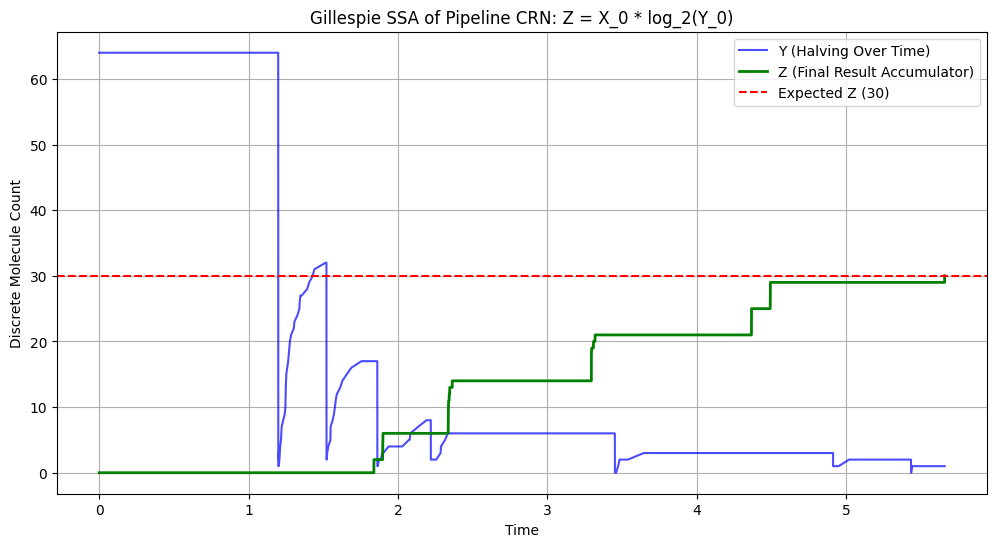

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_pipeline_crn(X0, Y0, k_slow = 1.0,k_medium = 1e4,k_fast = 1e8,k_faster = 1e12):


    max_steps=50000

    state = {
        'b': 1, 'a1': 0, 'Y': Y0, 'Yp': 0, 'c': 0, 'L': 0,
        'a2': 0, 'X': X0, 'Xp': 0, 'Z': 0
    }


    history = {k: [v] for k, v in state.items()}
    times = [0.0]
    t = 0.0

    for step in range(max_steps):

        props = [

            k_slow * state['b'],                                       # 0: b -> a1 + b
            k_faster * state['a1'] * (state['Y'] * (state['Y'] - 1) / 2), # 1: a1 + 2Y -> c + Yp + a1
            k_faster * (state['c'] * (state['c'] - 1) / 2),            # 2: 2c -> c (大逃殺)
            k_fast * state['a1'],                                      # 3: a1 -> 0
            k_medium * state['c'],                                     # 4: c -> L
            k_medium * state['Yp'],                                    # 5: Yp -> Y

            k_slow * state['L'],                                       # 6: L -> a2
            k_faster * state['a2'] * state['X'],                       # 7: a2 + X -> a2 + Xp + Z
            k_fast * state['a2'],                                      # 8: a2 -> 0
            k_medium * state['Xp']                                     # 9: Xp -> X
        ]

        a0 = sum(props)
        if a0 == 0:
            break

        dt = np.random.exponential(1 / a0)
        t += dt

        r = np.random.uniform(0, a0)
        cum = 0.0
        chosen = -1
        for i, p in enumerate(props):
            cum += p
            if r < cum:
                chosen = i
                break

        if chosen == 0:   state['a1'] += 1
        elif chosen == 1: state['Y'] -= 2; state['c'] += 1; state['Yp'] += 1
        elif chosen == 2: state['c'] -= 1
        elif chosen == 3: state['a1'] -= 1
        elif chosen == 4: state['c'] -= 1; state['L'] += 1
        elif chosen == 5: state['Yp'] -= 1; state['Y'] += 1
        elif chosen == 6: state['L'] -= 1; state['a2'] += 1
        elif chosen == 7: state['X'] -= 1; state['Xp'] += 1; state['Z'] += 1
        elif chosen == 8: state['a2'] -= 1
        elif chosen == 9: state['Xp'] -= 1; state['X'] += 1

        for k in state:
            history[k].append(state[k])
        times.append(t)

        if state['Y'] == 1 and state['L'] == 0 and state['Z'] == X0 * int(np.log2(Y0)):
            break

    return times, history

X_init = 5
Y_init = 64

print(f"start: X0 = {X_init}, Y0 = {Y_init}")
times, hist = simulate_pipeline_crn(X_init, Y_init,
                                    k_slow = 1.0,
                                    k_medium = 10,
                                    k_fast = 100,
                                    k_faster = 1000)
print(f"final z: {hist['Z'][-1]}")


plt.figure(figsize=(12, 6))
plt.plot(times, hist['Y'], label='Y (Halving Over Time)', color='blue', alpha=0.7)
plt.plot(times, hist['Z'], label='Z (Final Result Accumulator)', color='green', linewidth=2)
plt.axhline(y=X_init * int(np.log2(Y_init)), color='red', linestyle='--', label=f'Expected Z ({X_init * int(np.log2(Y_init))})')

plt.xlabel('Time')
plt.ylabel('Discrete Molecule Count')
plt.title('Gillespie SSA of Pipeline CRN: Z = X_0 * log_2(Y_0)')
plt.legend()
plt.grid(True)
plt.show()

###  $Y_\infty = 2^{\log_2 X_0}$

$$\begin{aligned}
b &\xrightarrow{\text{slow}} a_1 + b \\
a_1 + 2X &\xrightarrow{\text{faster}} c + X' + a_1 \\
2c &\xrightarrow{\text{faster}} c \\
a_1 &\xrightarrow{\text{fast}} \emptyset \\
c &\xrightarrow{\text{medium}} L \\
X' &\xrightarrow{\text{medium}} X \\
L &\xrightarrow{\text{slow}} a_2 \\
a_2 + Y &\xrightarrow{\text{faster}} a_2 + 2Y' \\
a_2 &\xrightarrow{\text{fast}} \emptyset \\
Y' &\xrightarrow{\text{medium}} Y
\end{aligned}$$

This function just the composite of given two examples.

X init:  1024


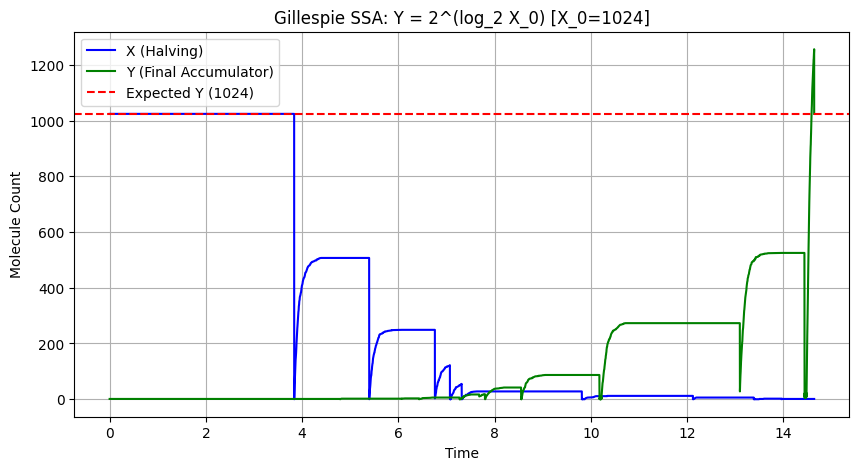

Initial X0: 1024, Final Y: 1024


In [60]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_pipeline_crn_exp_log(X0,k_slow = 1.0,
    k_medium = 1e4,
    k_fast = 1e8,
    k_faster = 1e12 ):


    max_steps=500000
    state = {
        'b': 1, 'a1': 0, 'X': X0, 'Xp': 0, 'c': 0, 'L': 0,
        'a2': 0, 'Y': 1, 'Yp': 0
    }

    history = {k: [v] for k, v in state.items()}
    times = [0.0]
    t = 0.0

    for step in range(max_steps):
        props = [
            k_slow * state['b'],                                          # 0: b -> a1 + b
            k_faster * state['a1'] * (state['X'] * (state['X'] - 1) / 2), # 1: a1 + 2X -> c + Xp + a1
            k_faster * (state['c'] * (state['c'] - 1) / 2),               # 2: 2c -> c
            k_fast * state['a1'],                                         # 3: a1 -> 0
            k_medium * state['c'],                                        # 4: c -> L
            k_medium * state['Xp'],                                       # 5: Xp -> X

            k_slow * state['L'],                                          # 6: L -> a2
            k_faster * state['a2'] * state['Y'],                          # 7: a2 + Y -> a2 + 2Yp
            k_fast * state['a2'],                                         # 8: a2 -> 0
            k_medium * state['Yp']                                        # 9: Yp -> Y
        ]

        a0 = sum(props)
        if a0 == 0: break

        dt = np.random.exponential(1 / a0)
        t += dt

        r = np.random.uniform(0, a0)
        cum = 0.0
        chosen = -1
        for i, p in enumerate(props):
            cum += p
            if r < cum:
                chosen = i
                break

        if chosen == 0:   state['a1'] += 1
        elif chosen == 1: state['X'] -= 2; state['c'] += 1; state['Xp'] += 1
        elif chosen == 2: state['c'] -= 1
        elif chosen == 3: state['a1'] -= 1
        elif chosen == 4: state['c'] -= 1; state['L'] += 1
        elif chosen == 5: state['Xp'] -= 1; state['X'] += 1
        elif chosen == 6: state['L'] -= 1; state['a2'] += 1
        elif chosen == 7: state['Y'] -= 1; state['Yp'] += 2
        elif chosen == 8: state['a2'] -= 1
        elif chosen == 9: state['Yp'] -= 1; state['Y'] += 1

        for k in state:
            history[k].append(state[k])
        times.append(t)
        if state['X'] == 1 and state['L'] == 0 and state['Y'] == 2**int(np.log2(X0)):
            break
    return times, history, step


X_init = 1024
print("X init: ",X_init)
times, hist, steps = simulate_pipeline_crn_exp_log(X_init,
                                                   k_slow = 1.0,
                                                   k_medium = 10,
                                                   k_fast = 100,
                                                   k_faster = 1000)

plt.figure(figsize=(10, 5))
plt.plot(times, hist['X'], label='X (Halving)', color='blue')
plt.plot(times, hist['Y'], label='Y (Final Accumulator)', color='green')
plt.axhline(y=X_init, color='red', linestyle='--', label=f'Expected Y ({X_init})')

plt.xlabel('Time')
plt.ylabel('Molecule Count')
plt.title(f'Gillespie SSA: Y = 2^(log_2 X_0) [X_0={X_init}]')
plt.legend()
plt.grid(True)
plt.show()

print(f"Initial X0: {X_init}, Final Y: {hist['Y'][-1]}")

Code for demo partially generate by AI. And I tune by using different speed of k.